<a href="https://colab.research.google.com/github/DarshiniSivakumar/CROWD_FLOW_FAIRNESS_PROJECT/blob/main/CrowdFlowFairness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

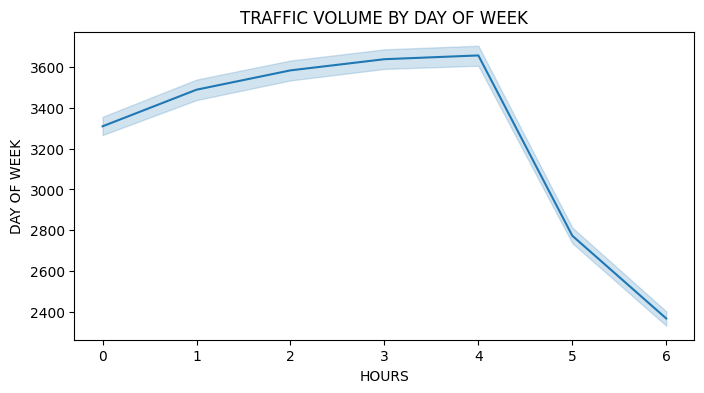

In [27]:
plt.figure(figsize=(8,4))
sns.lineplot(x="dayofweek",y="traffic_volume",data=df)
plt.xlabel("HOURS")
plt.ylabel("DAY OF WEEK")
plt.title("TRAFFIC VOLUME BY DAY OF WEEK")
plt.show()

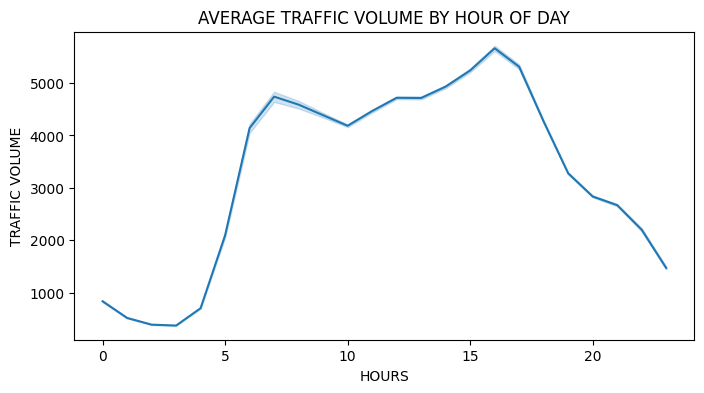

In [25]:
plt.figure(figsize=(8,4))
sns.lineplot(x="hour",y="traffic_volume",data=df)
plt.xlabel("HOURS")
plt.ylabel("TRAFFIC VOLUME")
plt.title("AVERAGE TRAFFIC VOLUME BY HOUR OF DAY")
plt.show()

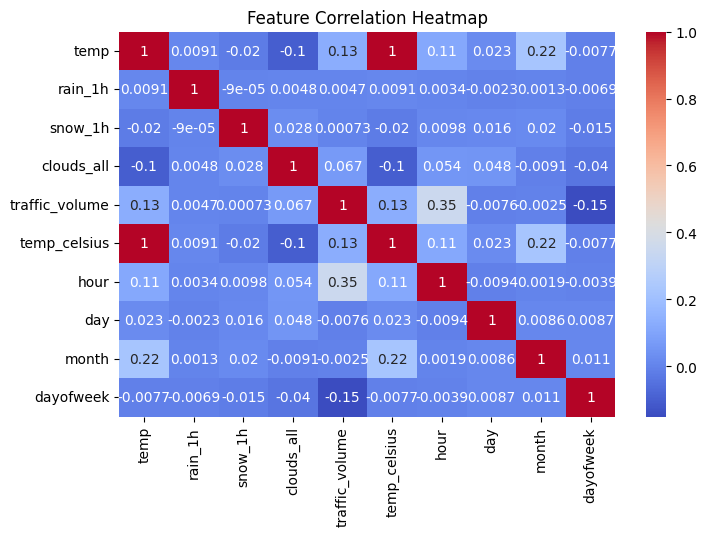

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
df.head()
df.to_csv("cleaned_crowd_dataset",index=False)

In [19]:
df['date_time']=pd.to_datetime(df['date_time'])
df['temp_celsius']=df['temp']-273.15
df['hour']=df['date_time'].dt.hour
df['day']=df['date_time'].dt.day
df['month']=df['date_time'].dt.month
df['dayofweek']=df['date_time'].dt.dayofweek

In [16]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
with zipfile.ZipFile("metro+interstate+traffic+volume (2).zip", "r") as zip_ref:
    print(zip_ref.namelist())


['Metro_Interstate_Traffic_Volume.csv.gz']


In [12]:
import zipfile
with zipfile.ZipFile("metro+interstate+traffic+volume (2).zip", "r") as zp:
  zp.extractall("data")
import pandas as pd
df=pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv.gz')
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
from google.colab import files
uploaded = files.upload()


Saving metro+interstate+traffic+volume (2).zip to metro+interstate+traffic+volume (2).zip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn